In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [68]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [69]:
# Flatten the 28x28 images into vectors of size 784
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

# Normalize the pixel values to [0, 1]
X_train /= 255.0
X_test /= 255.0

In [70]:
# Build the MLP model
model = Sequential()

# Add input layer and a hidden layer
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))  # Input size is 784 (28x28 flattened)
model.add(Dense(256, activation='relu'))  # Hidden layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer (10 units for 10 classes)

In [71]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Convert target variables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
trained = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8886 - loss: 0.3701 - val_accuracy: 0.9669 - val_loss: 0.1068
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0848 - val_accuracy: 0.9735 - val_loss: 0.0809
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.0563 - val_accuracy: 0.9775 - val_loss: 0.0783
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9784 - val_loss: 0.0719
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9892 - loss: 0.0319 - val_accuracy: 0.9784 - val_loss: 0.0744
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9779 - val_loss: 0.0836
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9917 - loss: 0.0243 - val_accuracy: 0.9796 - val_loss: 0.0750
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epoch')

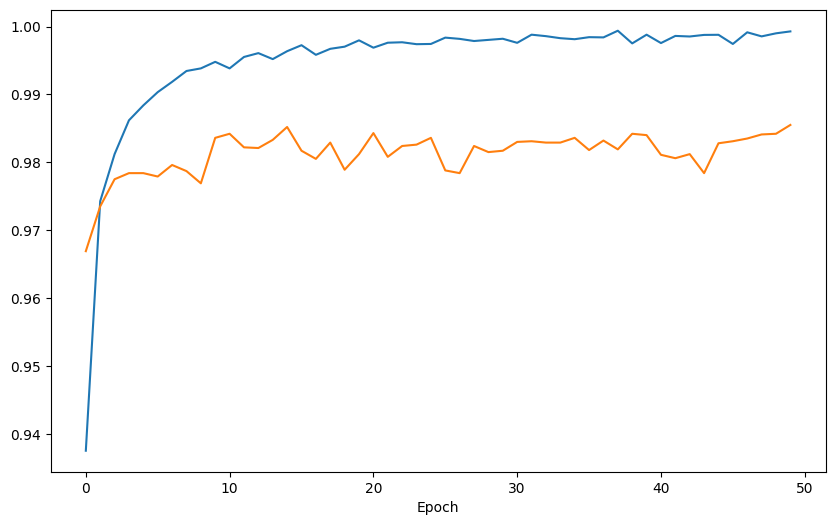

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9855
Precision: 0.9855244649904351
Recall: 0.9855
F1 Score: 0.9854932206690313

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Confusion Matrix:


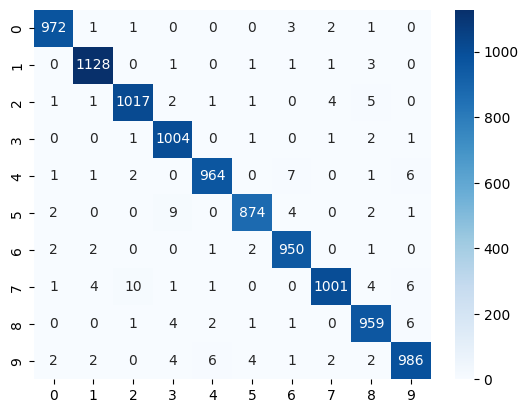

In [76]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Get the predicted class labels

# Convert y_test to class labels to match y_pred format
y_test_labels = np.argmax(y_test, axis=1)

# Now calculate the metrics using y_test_labels
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test_labels, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
print('\nConfusion Matrix:')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [41]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

# Flatten the 28x28 images into vectors of size 784
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

# Normalize the pixel values to [0, 1]
X_train /= 255.0
X_test /= 255.0

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [42]:
model2 = Sequential()

# Add input layer and a hidden layer
model2.add(Dense(512, activation='sigmoid', input_shape=(28 * 28,)))  # Input size is 784 (28x28 flattened)
model2.add(Dense(256, activation='sigmoid'))  # Hidden layer
model2.add(Dense(128, activation='sigmoid'))  # Hidden layer
model2.add(Dense(256, activation='sigmoid'))  # Hidden layer
model2.add(Dense(512, activation='sigmoid'))  # Hidden layer
model2.add(Dense(784, activation='sigmoid')) # Output layer - changed to 784 units to match target shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,132,944 (4.32 MB)

 Trainable params: 1,132,944 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
trained = model2.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2839 - mse: 0.0737 - val_loss: 0.2355 - val_mse: 0.0588
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2261 - mse: 0.0554 - val_loss: 0.1936 - val_mse: 0.0447
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1901 - mse: 0.0434 - val_loss: 0.1798 - val_mse: 0.0397
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1764 - mse: 0.0384 - val_loss: 0.1654 - val_mse: 0.0347
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1629 - mse: 0.0337 - val_loss: 0.1569 - val_mse: 0.0317
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1551 - mse: 0.0310 - val_loss: 0.1468 - val_mse: 0.0281
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1451 - mse: 0.0274 - val_loss: 0.1379 - val_mse: 0.0251
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1370 - mse: 0.0247 - val_loss: 0.1323 - val_mse: 0.0231
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


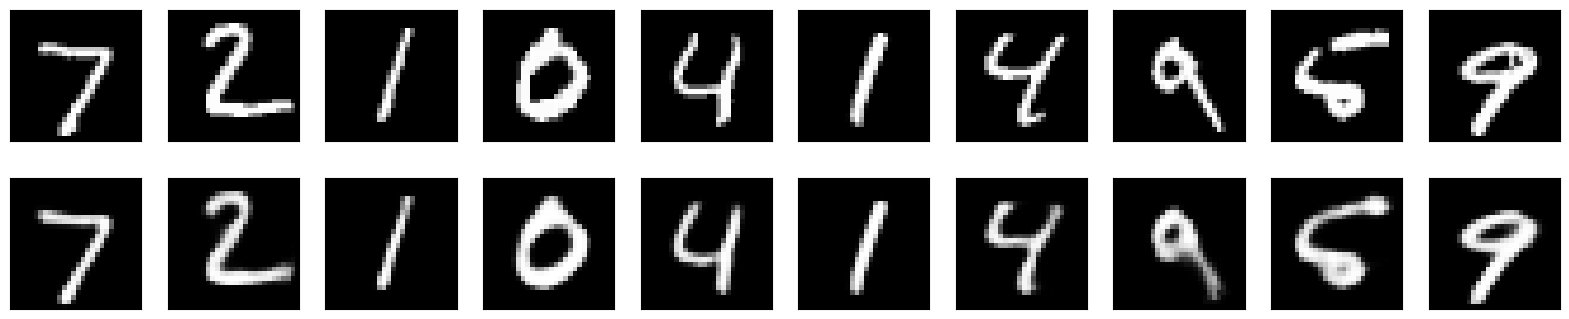

In [45]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Reshape to (1, 28 * 28) to represent a single sample in a batch
    decoded_imgs = model2.predict(X_test[i].reshape(1, 28 * 28))

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    # Access the first element of decoded_imgs since it's a batch of one
    plt.imshow(decoded_imgs[0].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()